In [7]:


import pandas as pd
import numpy as np
%pylab inline

import seaborn as sns
sns.set(style="ticks",font_scale=1.5,font='Helvetica')
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))


Populating the interactive namespace from numpy and matplotlib


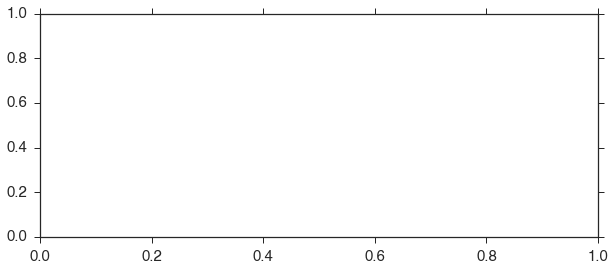

In [8]:

tr = .05

subplots(1,1,figsize=(10,4))
dat = pd.read_csv('../scanBOLD.txt',sep=' ')
dat["t"]=np.arange(dat.shape[0])*tr

#plot(dat["t"],dat["../scan.BOLD"],'-')
show()




In [9]:
mat = np.genfromtxt('../mat.txt')

In [10]:
(nrow,ncol) = mat.shape

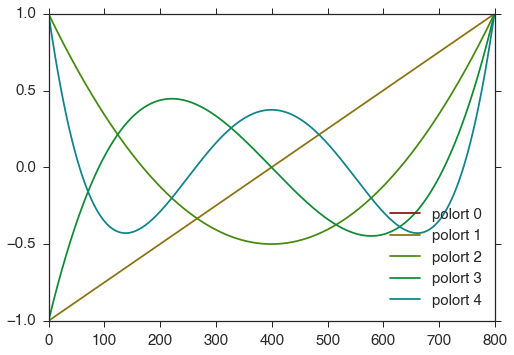

In [11]:
for i in range(1,ncol):
    plot(mat[:,i],'-',label='polort %i'%(i-1))
legend(loc='lower right')

In [12]:
p0 = mat[:,1]
p1 = mat[:,2]
p2 = mat[:,3]

In [13]:
n = 2
a = (2*n-1)/n * p0 * p1
b = (n-1)/n * p0
p2p = a - b

In [14]:
#a

In [15]:
#b

In [16]:
#p2

In [17]:
n = 3
a = (2*n-1)/n * p1 * p2
b = (n-1)/n * p1
p3 = a - b

In [18]:
#a

In [19]:
#a-b

In [20]:
#plot(mat[:,4])
#plot(p3,color='red')

In [22]:
#afnimat = np.genfromtxt('../nodata.xmat.1D')

In [ ]:
#plot(afnimat)

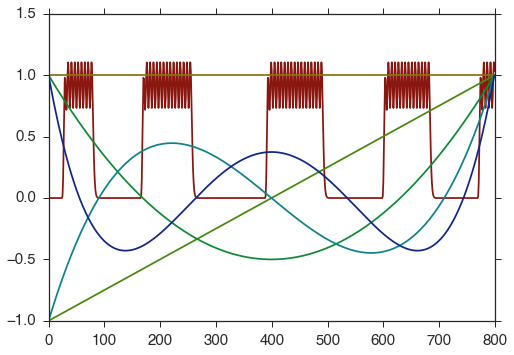

In [23]:
chainseqmat = np.genfromtxt('../mat.txt')
plot(chainseqmat)

In [ ]:
# Let's look at the history -- exciting!

In [24]:
history = pd.read_csv('../history.txt',sep=" ")

In [25]:
history.iloc[:10]

,iteration,n.move.opportunities,n.improving.moves,move.location,move.dir,move.amount,efficiency,design
0,0,236,189,3,4,13,9.89674,"7.32, 18.3, 25.62, 30.012, 48.312, 58.56, 69.5..."
1,1,236,188,4,5,19,9.97261,"7.32, 18.3, 25.62, 30.012, 34.404, 58.56, 69.5..."
2,2,232,184,5,6,27,10.05080,"7.32, 18.3, 25.62, 30.012, 34.404, 38.796, 69...."
3,3,228,182,6,7,36,10.12800,"7.32, 18.3, 25.62, 30.012, 34.404, 38.796, 43...."
4,4,224,178,7,8,43,10.20100,"7.32, 18.3, 25.62, 30.012, 34.404, 38.796, 43...."
5,5,220,174,56,55,11,10.26820,"7.32, 18.3, 25.62, 30.012, 34.404, 38.796, 43...."
6,6,220,168,29,30,12,10.33300,"7.32, 18.3, 25.62, 30.012, 34.404, 38.796, 43...."
7,7,220,166,30,31,22,10.39660,"7.32, 18.3, 25.62, 30.012, 34.404, 38.796, 43...."
8,8,216,163,28,31,9,10.46100,"7.32, 18.3, 25.62, 30.012, 34.404, 38.796, 43...."
9,9,212,157,27,31,10,10.52490,"7.32, 18.3, 25.62, 30.012, 34.404, 38.796, 43...."


In [26]:
designs = []
for i,hist in history.iterrows():
    des = [ float(v.strip()) for v in hist["design"].split(",") ]
    designs.append(des)

In [27]:
mat = matrix(designs)
mat.shape

(90, 60)

In [28]:
mat[4,:]

matrix([[   7.32 ,   18.3  ,   25.62 ,   30.012,   34.404,   38.796,
           43.188,   47.58 ,   88.572,   96.624,  103.944,  113.46 ,
          125.904,  135.42 ,  143.472,  153.72 ,  158.844,  171.288,
          177.144,  182.268,  192.516,  202.764,  215.208,  223.26 ,
          234.24 ,  246.684,  258.396,  270.108,  281.088,  294.264,
          305.976,  316.224,  324.276,  334.524,  344.772,  354.288,
          364.536,  373.32 ,  382.104,  390.888,  399.672,  409.188,
          416.508,  423.828,  433.344,  441.396,  449.448,  457.5  ,
          467.748,  478.728,  486.048,  494.1  ,  507.276,  516.792,
          527.04 ,  538.752,  551.196,  559.248,  569.496,  576.084]])

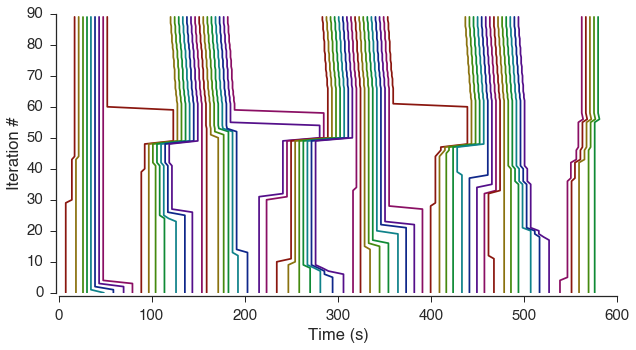

In [33]:
f,axarr=subplots(1,1,figsize=(10,5))
for i in range(mat.shape[1]):
    plot(
         mat[:,i],range(mat.shape[0]),'-')
xlabel("Time (s)")
ylabel("Iteration #")
sns.despine(offset=3)
savefig('from_event_to_block.pdf')

**Observation**: it seems we only move a trial once in a history. Is that true? I mean, we move the trial various times in a row: we don't return to it later on because other trials have shifted.

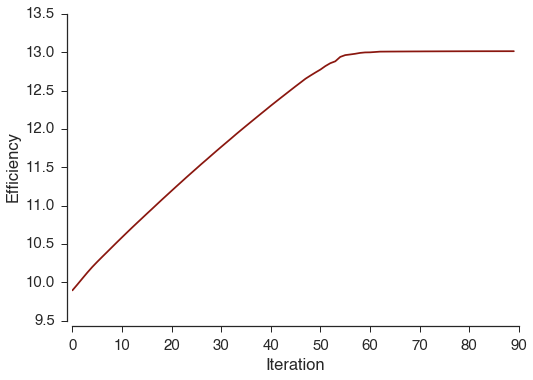

In [38]:
plot(history["efficiency"],'-')
xlabel("Iteration")
ylabel("Efficiency")
sns.despine(offset=5)